In [1]:
%matplotlib inline

In [107]:
import numpy as np
import scipy.stats as statmvs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [111]:
# set some seaborn aesthetics
sbn.set_palette("Set1")

In [112]:
## simulate one way ANOVA under the null hypothesis of no 
## difference in group means

groupmeans = [0, 0, 0, 0]
k = len(groupmeans) # number of groups
groupstds = [1] * k  # standard deviations equal across groups
n = 25 # sample size

# generate samples
samples = [stats.norm.rvs(loc=i, scale=j, size = n) for (i,j) in zip(groupmeans,groupstds)]

Between group estimate of population variance: 0.433882883868
Within group estiamte of population variance: 0.897000332532
Fstat = Vbtw/Vwin =  0.483704262007


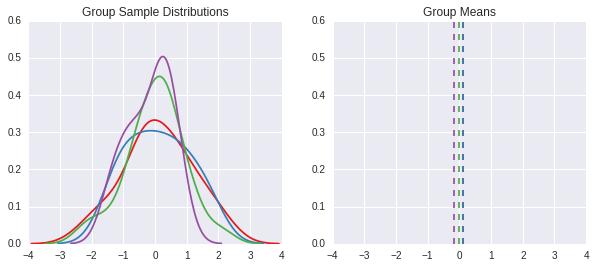

In [113]:


# draw a figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
clrs = sbn.color_palette("Set1", n_colors=k)

for i, sample in enumerate(samples):
    sbn.kdeplot(sample, color=clrs[i], ax=ax1)
ax1_ymax = ax1.get_ylim()[1]

for i, sample in enumerate(samples):
    ax2.vlines(np.mean(sample), 0, ax1_ymax, linestyle="dashed", color=clrs[i])
ax2.set_xlim(ax1.get_xlim())
ax2.set_ylim(ax1.get_ylim())    

ax1.set_title("Group Sample Distributions")
ax2.set_title("Group Means")

# Between-group and within-group estimates of variance
sample_group_means = [np.mean(s) for s in samples]
sample_group_var = [np.var(s, ddof=1) for s in samples]

Vbtw = n * np.var(sample_group_means, ddof=1)
Vwin = np.mean(sample_group_var)
Fstat = Vbtw/Vwin

print("Between group estimate of population variance:", Vbtw)
print("Within group estiamte of population variance:", Vwin)
print("Fstat = Vbtw/Vwin = ", Fstat)


In [119]:
# now carry out many such simulations to estimate the sampling distristribution
# of our F-test statistic

groupmeans = [0, 0, 0, 0]
k = len(groupmeans) # number of groups
groupstds = [1] * k  # standard deviations equal across groups
n = 25 # sample size

nsims = 1000
Fstats = []
for sim in range(nsims):
    samples = [stats.norm.rvs(loc=i, scale=j, size = n) for (i,j) in zip(groupmeans,groupstds)]
    sample_group_means = [np.mean(s) for s in samples]
    sample_group_var = [np.var(s, ddof=1) for s in samples]
    Vbtw = n * np.var(sample_group_means, ddof=1)
    Vwin = np.mean(sample_group_var)
    Fstat = Vbtw/Vwin
    Fstats.append(Fstat)
    
Fstats = np.array(Fstats)


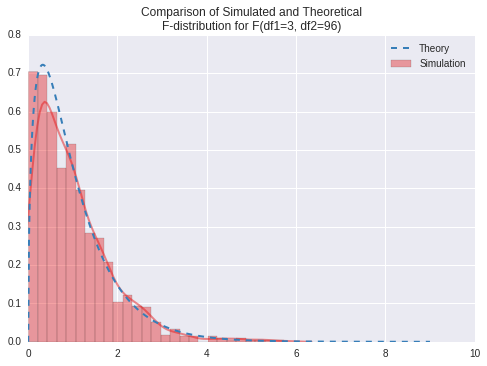

In [124]:
fig, ax = plt.subplots()
sbn.distplot(Fstats, ax=ax, label="Simulation",
             kde_kws=dict(alpha=0.5, linewidth=2))

# plot the theoretical F-distribution for
# corresponding degrees of freedom
df1 = k - 1
df2 = n*k - k
x = np.linspace(0,9,500)
Ftheory = stats.f.pdf(x, df1, df2)
plt.plot(x,Ftheory, linestyle='dashed', linewidth=2, label="Theory")

# axes, legends, title
ax.set_xlim(0, )
ax.legend()
title = \
"""Comparison of Simulated and Theoretical
F-distribution for F(df1={}, df2={})"""
ax.set_title(title.format(df1, df2))

pass

In [125]:
# now simulate case where one of the group means is different

groupmeans = [0, 0, 0, 1]
k = len(groupmeans) # number of groups
groupstds = [1] * k  # standard deviations equal across groups
n = 25 # sample size

nsims = 1000
Fstats = []
for sim in range(nsims):
    samples = [stats.norm.rvs(loc=i, scale=j, size = n) for (i,j) in zip(groupmeans,groupstds)]
    sample_group_means = [np.mean(s) for s in samples]
    sample_group_var = [np.var(s, ddof=1) for s in samples]
    Vbtw = n * np.var(sample_group_means, ddof=1)
    Vwin = np.mean(sample_group_var)
    Fstat = Vbtw/Vwin
    Fstats.append(Fstat)
    
Fstats = np.array(Fstats)


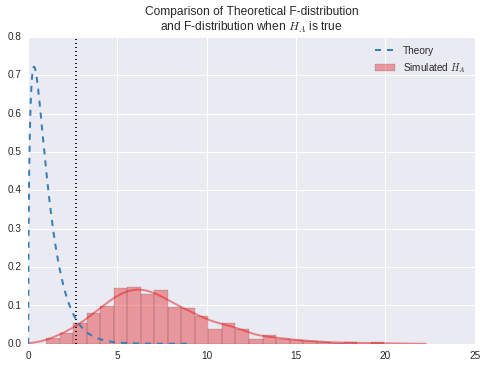

In [131]:
fig, ax = plt.subplots()
sbn.distplot(Fstats, ax=ax, label="Simulated $H_A$",
             kde_kws=dict(alpha=0.5, linewidth=2))

# plot the theoretical F-distribution for
# corresponding degrees of freedom
df1 = k - 1
df2 = n*k - k
x = np.linspace(0,9,500)
Ftheory = stats.f.pdf(x, df1, df2)
plt.plot(x,Ftheory, linestyle='dashed', linewidth=2, label="Theory")

ymin, ymax = ax.get_ylim()
# Draw threshold alpha = 0.05
ax.vlines(stats.f.ppf(0.95, df1, df2), 0, ymax, linestyle='dotted', color='k')

# axes, legends, title
ax.set_xlim(0, )
ax.set_ylim(0, ymax)
ax.legend()
title = \
"""Comparison of Theoretical F-distribution
and F-distribution when $H_A$ is true"""
ax.set_title(title.format(df1, df2))

pass